<a href="https://colab.research.google.com/github/jajapuramshivasai/QML_Demo/blob/main/Quantum_Machine_Learning_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit
!pip install qiskit_machine_learning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 19.8 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512549 sha256=5ea7470251c27055510a3acafaa15f7c22045cfc3cbf0258f13da0ff9a83c541
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d51

In [2]:
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 42

In [3]:
from qiskit_machine_learning.datasets import ad_hoc_data

adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=20,
    test_size=5,
    n=adhoc_dimension,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

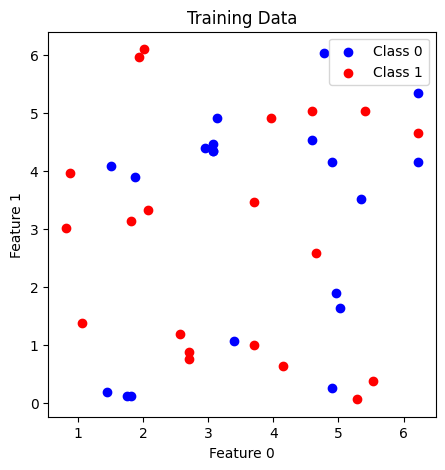

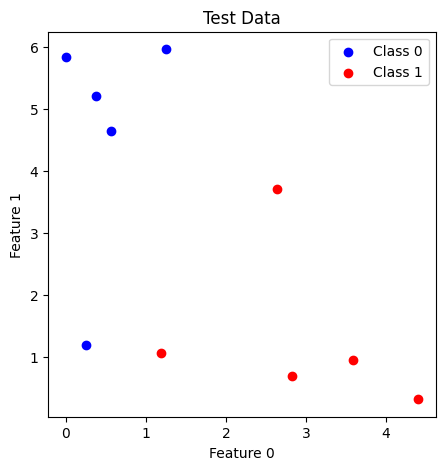

In [4]:
import matplotlib.pyplot as plt

# Plot the training data
plt.figure(figsize=(5, 5))
plt.scatter(train_features[:, 0][train_labels == 0], train_features[:, 1][train_labels == 0], marker='o', color='b', label='Class 0')
plt.scatter(train_features[:, 0][train_labels == 1], train_features[:, 1][train_labels == 1], marker='o', color='r', label='Class 1')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Training Data')
plt.legend()
plt.show()

# Plot the test data
plt.figure(figsize=(5, 5))
plt.scatter(test_features[:, 0][test_labels == 0], test_features[:, 1][test_labels == 0], marker='o', color='b', label='Class 0')
plt.scatter(test_features[:, 0][test_labels == 1], test_features[:, 1][test_labels == 1], marker='o', color='r', label='Class 1')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Test Data')
plt.legend()
plt.show()


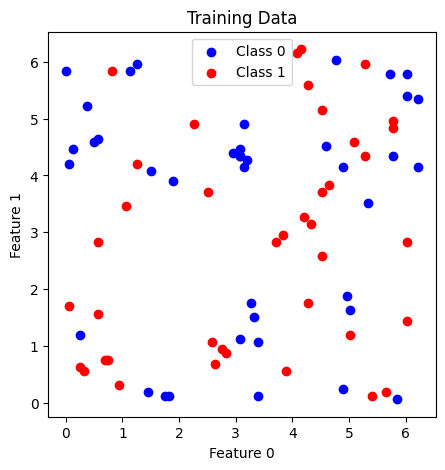

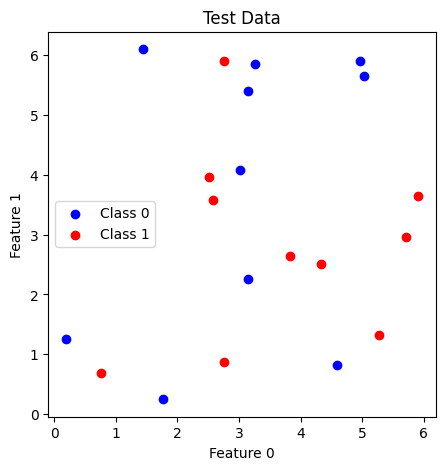

In [5]:
# prompt: save plots

plt.figure(figsize=(5, 5))
plt.scatter(train_features[:, 0][train_labels == 0], train_features[:, 1][train_labels == 0], marker='o', color='b', label='Class 0')
plt.scatter(train_features[:, 0][train_labels == 1], train_features[:, 1][train_labels == 1], marker='o', color='r', label='Class 1')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Training Data')
plt.legend()
plt.savefig('training_data.png')
plt.show()

plt.figure(figsize=(5, 5))
plt.scatter(test_features[:, 0][test_labels == 0], test_features[:, 1][test_labels == 0], marker='o', color='b', label='Class 0')
plt.scatter(test_features[:, 0][test_labels == 1], test_features[:, 1][test_labels == 1], marker='o', color='r', label='Class 1')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Test Data')
plt.legend()
plt.savefig('test_data.png')
plt.show()


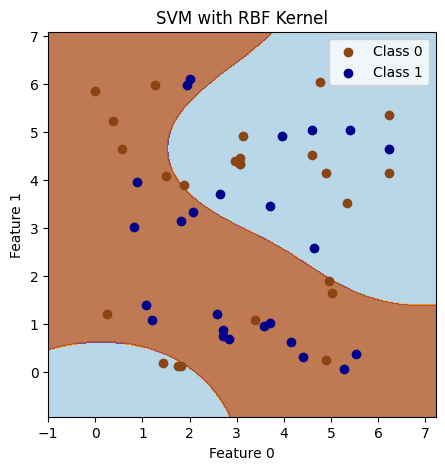

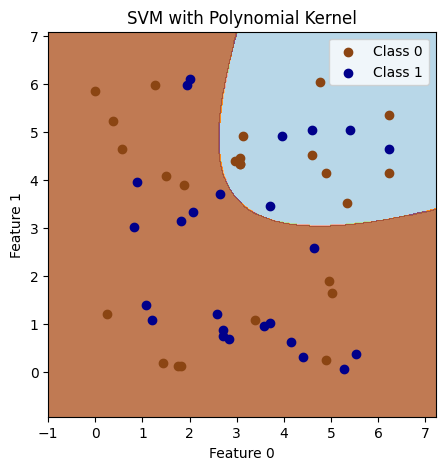

In [36]:


from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Create an SVM classifier with an RBF kernel
svm_rbf = SVC(kernel='rbf')

# Train the classifier on the training data
svm_rbf.fit(train_features, train_labels)

# Create an SVM classifier with a polynomial kernel
svm_poly = SVC(kernel='poly')

# Train the classifier on the training data
svm_poly.fit(train_features, train_labels)

# Create a meshgrid for plotting the decision boundary
x_min, x_max = train_features[:, 0].min() - 1, train_features[:, 0].max() + 1
y_min, y_max = train_features[:, 1].min() - 1, train_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the meshgrid for RBF
Z_rbf = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

# Predict the class for each point in the meshgrid for Poly
Z_poly = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)


# Plot the decision boundary and data points for RBF
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_rbf, alpha=0.4)
plt.scatter(train_features[:, 0][train_labels == 0], train_features[:, 1][train_labels == 0], marker='o', color='b', label='Train Class 0')
plt.scatter(train_features[:, 0][train_labels == 1], train_features[:, 1][train_labels == 1], marker='o', color='r', label='Train Class 1')
plt.scatter(test_features[:, 0][test_labels == 0], test_features[:, 1][test_labels == 0], marker='x', color='b', label='Test Class 0')
plt.scatter(test_features[:, 0][test_labels == 1], test_features[:, 1][test_labels == 1], marker='x', color='r', label='Test Class 1')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('SVM with RBF Kernel')
plt.legend()

# Plot the decision boundary and data points for Poly
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_poly, alpha=0.4)
plt.scatter(train_features[:, 0][train_labels == 0], train_features[:, 1][train_labels == 0], marker='o', color='b', label='Train Class 0')
plt.scatter(train_features[:, 0][train_labels == 1], train_features[:, 1][train_labels == 1], marker='o', color='r', label='Train Class 1')
plt.scatter(test_features[:, 0][test_labels == 0], test_features[:, 1][test_labels == 0], marker='x', color='b', label='Test Class 0')
plt.scatter(test_features[:, 0][test_labels == 1], test_features[:, 1][test_labels == 1], marker='x', color='r', label='Test Class 1')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('SVM with Polynomial Kernel')
plt.legend()
plt.show()



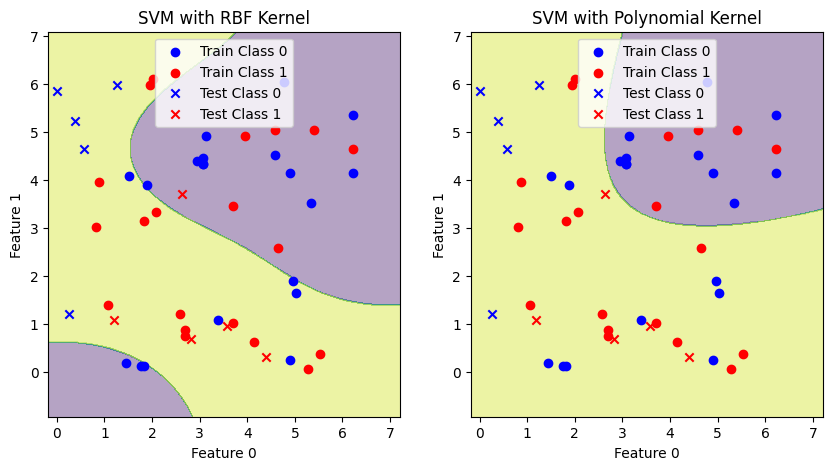

In [35]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_rbf, alpha=0.4)
plt.scatter(train_features[:, 0][train_labels == 0], train_features[:, 1][train_labels == 0], marker='o', color='b', label='Train Class 0')
plt.scatter(train_features[:, 0][train_labels == 1], train_features[:, 1][train_labels == 1], marker='o', color='r', label='Train Class 1')
plt.scatter(test_features[:, 0][test_labels == 0], test_features[:, 1][test_labels == 0], marker='x', color='b', label='Test Class 0')
plt.scatter(test_features[:, 0][test_labels == 1], test_features[:, 1][test_labels == 1], marker='x', color='r', label='Test Class 1')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('SVM with RBF Kernel')
plt.legend()
plt.savefig('svm_rbf_plot.png')

# Plot the decision boundary and data points for Poly
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_poly, alpha=0.4)
plt.scatter(train_features[:, 0][train_labels == 0], train_features[:, 1][train_labels == 0], marker='o', color='b', label='Train Class 0')
plt.scatter(train_features[:, 0][train_labels == 1], train_features[:, 1][train_labels == 1], marker='o', color='r', label='Train Class 1')
plt.scatter(test_features[:, 0][test_labels == 0], test_features[:, 1][test_labels == 0], marker='x', color='b', label='Test Class 0')
plt.scatter(test_features[:, 0][test_labels == 1], test_features[:, 1][test_labels == 1], marker='x', color='r', label='Test Class 1')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('SVM with Polynomial Kernel')
plt.legend()
plt.savefig('svm_poly_plot.png')
plt.show()


In [40]:
import matplotlib.pyplot as plt
import numpy as np


def plot_features(ax, features, labels, class_label, marker, face, edge, label):
    # A train plot
    ax.scatter(
        # x coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 0],
        # y coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 1],
        marker=marker,
        facecolors=face,
        edgecolors=edge,
        label=label,
    )


def plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total):

    plt.figure(figsize=(5, 5))
    plt.ylim(0, 2 * np.pi)
    plt.xlim(0, 2 * np.pi)
    plt.imshow(
        np.asmatrix(adhoc_total).T,
        interpolation="nearest",
        origin="lower",
        cmap="RdBu",
        extent=[0, 2 * np.pi, 0, 2 * np.pi],
    )

    # A train plot
    plot_features(plt, train_features, train_labels, 0, "s", "w", "b", "A train")

    # B train plot
    plot_features(plt, train_features, train_labels, 1, "o", "w", "r", "B train")

    # A test plot
    plot_features(plt, test_features, test_labels, 0, "s", "b", "w", "A test")

    # B test plot
    plot_features(plt, test_features, test_labels, 1, "o", "r", "w", "B test")

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.title("QSVM")

    plt.show()

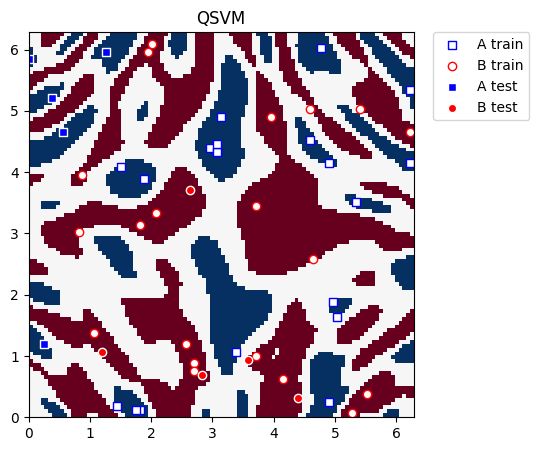

<Figure size 640x480 with 0 Axes>

In [41]:
plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total)
plt.savefig('adhoc_dataset.png')


In [13]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import ZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map)

<ipython-input-13-c6fb669a4b02>:9: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


In [9]:
from sklearn.svm import SVC

adhoc_svc = SVC(kernel=adhoc_kernel.evaluate)

adhoc_svc.fit(train_features, train_labels)

adhoc_score_callable_function = adhoc_svc.score(test_features, test_labels)

print(f"Callable kernel classification test score: {adhoc_score_callable_function}")

Callable kernel classification test score: 1.0


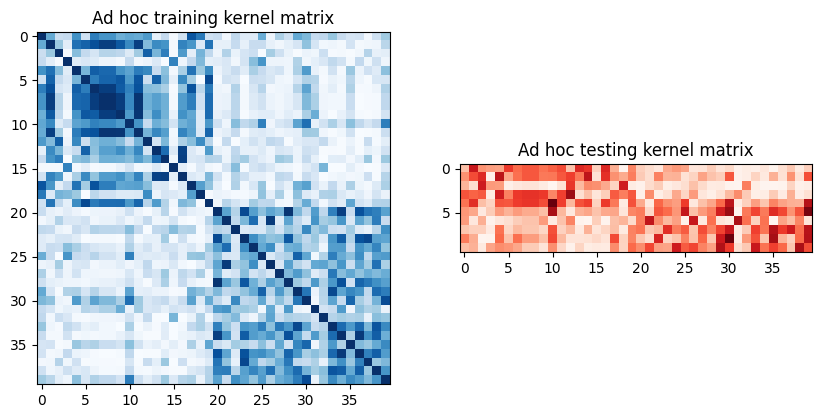

In [10]:
adhoc_matrix_train = adhoc_kernel.evaluate(x_vec=train_features)
adhoc_matrix_test = adhoc_kernel.evaluate(x_vec=test_features, y_vec=train_features)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(adhoc_matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Ad hoc training kernel matrix")

axs[1].imshow(np.asmatrix(adhoc_matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")


plt.show()

-----------
#visualization

In [9]:
num_qubits = 3

# Create a ZZFeatureMap with the specified number of qubits and depth
feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=2, entanglement='linear')

feature_map.decompose().draw()

┌───┐┌─────────────┐                                          ┌───┐»
q_0: ┤ H ├┤ P(2.0*x[0]) ├──■────────────────────────────────────■──┤ H ├»
     ├───┤├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐└───┘»
q_1: ┤ H ├┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──■──»
     ├───┤├─────────────┤└───┘└──────────────────────────────┘└───┘┌─┴─┐»
q_2: ┤ H ├┤ P(2.0*x[2]) ├──────────────────────────────────────────┤ X ├»
     └───┘└─────────────┘                                          └───┘»
«             ┌─────────────┐                                       »
«q_0: ────────┤ P(2.0*x[0]) ├────────────────────────────────────■──»
«             └─────────────┘              ┌───┐┌─────────────┐┌─┴─┐»
«q_1: ──────────────────────────────────■──┤ H ├┤ P(2.0*x[1]) ├┤ X ├»
«     ┌──────────────────────────────┐┌─┴─┐├───┤├─────────────┤└───┘»
«q_2: ┤ P(2.0*(π - x[1])*(π - x[2])) ├┤ X ├┤ H ├┤ P(2.0*x[2]) ├─────»
«     └──────────────────────────────┘└───┘└───┘└─────────────┘     »
«                                               »
«q_0: ──────────────────────────────────■───────»
«     ┌──────────────────────────────┐┌─┴─┐     »
«q_1: ┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──■──»
«     └──────────────────────────────┘└───┘┌─┴─┐»
«q_2: ─────────────────────────────────────┤ X ├»
«                                          └───┘»
«                                          
«q_0: ─────────────────────────────────────
«                                          
«q_1: ──────────────────────────────────■──
«     ┌──────────────────────────────┐┌─┴─┐
«q_2: ┤ P(2.0*(π - x[1])*(π - x[2])) ├┤ X ├
«     └──────────────────────────────┘└───┘

In [21]:


# -----------
# #visualization
num_qubits = 3

# Create a ZFeatureMap with the specified number of qubits and depth
feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=2)

feature_map.decompose().draw()


┌───┐┌─────────────┐┌───┐┌─────────────┐
q_0: ┤ H ├┤ P(2.0*x[0]) ├┤ H ├┤ P(2.0*x[0]) ├
     ├───┤├─────────────┤├───┤├─────────────┤
q_1: ┤ H ├┤ P(2.0*x[1]) ├┤ H ├┤ P(2.0*x[1]) ├
     ├───┤├─────────────┤├───┤├─────────────┤
q_2: ┤ H ├┤ P(2.0*x[2]) ├┤ H ├┤ P(2.0*x[2]) ├
     └───┘└─────────────┘└───┘└─────────────┘

#END
-------------------